In [1]:
%pip install keras==2.15.0

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires keras>=3.0.0, but you have keras 2.15.0 which is incompatible.


In [3]:
%pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

  Using cached keras-3.2.1-py3-none-any.whl.metadata (5.6 kB)
Using cached keras-3.2.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1


In [5]:
import os
print(os.listdir("C://Users//Riddhi//Desktop//IO Project//images2"))

['apple_pie', 'baby_back_ribs', 'baklava']


In [6]:
values=['apple_pie', 'baby_back_ribs', 'baklava']
values.sort()
values = values[0:]
print(values)

['apple_pie', 'baby_back_ribs', 'baklava']


In [7]:
print("Number of classes:",len(values))

Number of classes: 3


In [8]:
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."

In [9]:
len(calories)

101

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)
train_data = train_datagen.flow_from_directory("C://Users//Riddhi//Desktop//IO Project//images2",
                                               target_size=(224,224),
                                               batch_size=64,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory("C://Users//Riddhi//Desktop//IO Project//images2",
                                               target_size=(224,224),
                                               batch_size=64,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 1851 images belonging to 3 classes.
Found 204 images belonging to 3 classes.


In [13]:
import tensorflow as tf

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [14]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=test_data,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


c:\Users\Riddhi\anaconda3\envs\test1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 196s 6s/step - accuracy: 0.7287 - loss: 0.6634 - val_accuracy: 0.8775 - val_loss: 0.3572
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 170s 5s/step - accuracy: 0.8738 - loss: 0.3417 - val_accuracy: 0.8676 - val_loss: 0.2996
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.8977 - loss: 0.2947 - val_accuracy: 0.8725 - val_loss: 0.2777
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.9209 - loss: 0.2315 - val_accuracy: 0.8725 - val_loss: 0.3356
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.9243 - loss: 0.2199 - val_accuracy: 0.8529 - val_loss: 0.3673


In [15]:
loss , acc = model.evaluate(test_data)
print("Test accuracy:", round(acc,4)*100,'%', "\nLoss value:",loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.8591 - loss: 0.3702
Test accuracy: 88.73 % 
Loss value: 0.29256317019462585


In [17]:
print(os.listdir("C://Users//Riddhi//Desktop//IO Project//images"))

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

Apple pie Sample


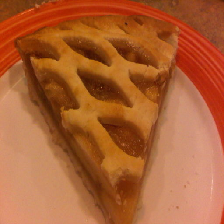

In [18]:
print("Apple pie Sample")
apple_pie = load_img("C://Users//Riddhi//Desktop//IO Project//images//apple_pie//136256.jpg",target_size=(224,224,3))
apple_pie

Baby Back Ribs Sample


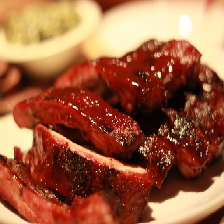

In [19]:
print("Baby Back Ribs Sample")
baby_back_ribs = load_img("C://Users//Riddhi//Desktop//IO Project//images2//baby_back_ribs//2432.jpg",target_size=(224,224,3))
baby_back_ribs

Baklava Sample


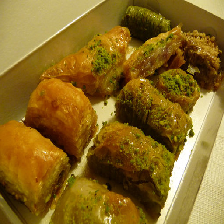

In [20]:
print("Baklava Sample")
baklava = load_img("C://Users//Riddhi//Desktop//IO Project//images2//baklava//788.jpg",target_size=(224,224,3))
baklava

Text(0.5, 1.0, 'Baklava')

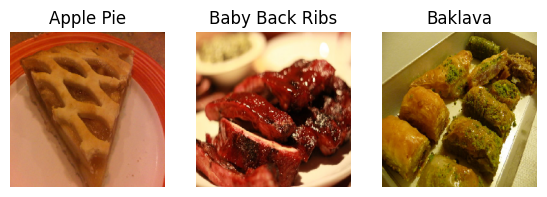

In [21]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 6, 1)
plt.axis('off')
plt.imshow(apple_pie)
plt.title("Apple Pie")
# _____________________________________________
fig.add_subplot(1, 6, 2)
plt.axis('off')
plt.imshow(baby_back_ribs)
plt.title("Baby Back Ribs")
# _____________________________________________
fig.add_subplot(1, 6, 3)
plt.axis('off')
plt.imshow(baklava)
plt.title("Baklava")

In [23]:
apple_pie = img_to_array(apple_pie)
baklava = img_to_array(baklava)
baby_back_ribs = img_to_array(baby_back_ribs)
#baklava2 = img_to_array(baklava2)

apple_pie = apple_pie/255
baklava = baklava/255
baby_back_ribs = baby_back_ribs/255
#baklava2 = baklava2/225

apple_pie = apple_pie.reshape(1,224,224,3)
baklava = baklava.reshape(1,224,224,3)
baby_back_ribs = baby_back_ribs.reshape(1,224,224,3)
#baklava2 = baklava2.reshape(1,224,224,3)

apple_pie.shape

(1, 224, 224, 3)

In [25]:
p2 = (model.predict(baklava)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2],'\nNote:',s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Class 2: baklava
Baklava: ~5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [26]:
p2 = (model.predict(baby_back_ribs)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2],'\nNote:',s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Class 1: baby_back_ribs
Baby Back Ribs: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [27]:
model.save('io_mobilenet.h5')